In [ ]:
from google.colab import drive
from google.colab import files
upload = files.upload()

Saving dataset_project.csv to dataset_project.csv


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Reading Data 
dataset = pd.read_csv("dataset_project.csv")
dataset

,year,area,production,productivity,rainfall,temperature
0,1950,75,5009,66.79,932.6,23.71
1,1951,84,5751,68.46,797.0,24.22
2,1952,73,4389,60.12,683.3,24.34
3,1953,71,5250,73.94,893.6,24.57
4,1954,74,5294,71.54,985.1,24.13
...,...,...,...,...,...,...
63,2013,937,76901,82.07,962.4,24.82
64,2014,1048,81870,78.12,838.0,24.73
65,2015,987,75087,76.08,644.5,24.91
66,2016,633,52262,82.56,906.3,26.45


In [ ]:
dataset.describe()

,year,area,production,productivity,rainfall,temperature
count,68.00000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1983.50000,390.897059,31385.764706,78.792941,909.804412,24.453676
std,19.77372,294.741938,23816.851508,9.783098,148.574998,0.504141
min,1950.00000,71.000000,4389.000000,57.940000,519.900000,23.710000
25%,1966.75000,163.750000,11508.250000,71.505000,804.950000,24.117500
50%,1983.50000,292.000000,24537.000000,79.445000,917.850000,24.355000
75%,2000.25000,540.750000,44480.000000,85.680000,996.025000,24.670000
max,2017.00000,1093.000000,88437.000000,96.900000,1395.700000,26.650000


As mean of productivity is showing 78.79, so cutoff is taken as 80

In [ ]:
# deciding cutoff for productivity for low and high
def new_type(row):
  if(row['productivity'])>=80:
    val = "high"
  else:
    val = "low"
  return val


In [ ]:
dataset['productivity_type']= dataset.apply(new_type, axis=1)
dataset.head()

,year,area,production,productivity,rainfall,temperature,productivity_type
0,1950,75,5009,66.79,932.6,23.71,low
1,1951,84,5751,68.46,797.0,24.22,low
2,1952,73,4389,60.12,683.3,24.34,low
3,1953,71,5250,73.94,893.6,24.57,low
4,1954,74,5294,71.54,985.1,24.13,low


In [ ]:
#total number of count of low and high productivity
dataset.productivity_type.value_counts()

low     35
high    33
Name: productivity_type, dtype: int64

In [ ]:
# Assigning target value repective to productivity type 
dataset.loc[dataset['productivity_type'] == 'high', 'Target'] = 1
dataset.loc[dataset['productivity_type'] == 'low', 'Target'] = 0
dataset

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,low,0.0
4,1954,74,5294,71.54,985.1,24.13,low,0.0
...,...,...,...,...,...,...,...,...
63,2013,937,76901,82.07,962.4,24.82,high,1.0
64,2014,1048,81870,78.12,838.0,24.73,low,0.0
65,2015,987,75087,76.08,644.5,24.91,low,0.0
66,2016,633,52262,82.56,906.3,26.45,high,1.0


In [ ]:
#value coming out same as productivity type
dataset.Target.value_counts()

0.0    35
1.0    33
Name: Target, dtype: int64

In [ ]:
# Clustering low and high productivity 
df0 = dataset[dataset.Target == 0]
df1 = dataset[dataset.Target == 1]

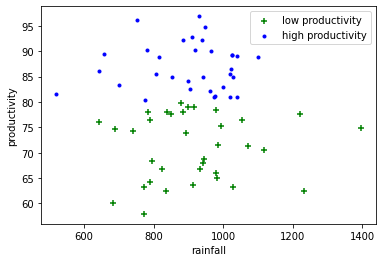

In [ ]:
#visualising dataset 
plt.xlabel('rainfall')
plt.ylabel('productivity')
plt.scatter(df0['rainfall'], df0['productivity'],color="green",marker='+')
plt.scatter(df1['rainfall'], df1['productivity'],color="blue",marker='.')
plt.legend(["low productivity ","high productivity"])
plt.show()

In [ ]:
# Dropping dropping Target column and productivity
x = dataset.drop(["productivity_type","Target"],axis = "columns")
x.head()

,year,area,production,productivity,rainfall,temperature
0,1950,75,5009,66.79,932.6,23.71
1,1951,84,5751,68.46,797.0,24.22
2,1952,73,4389,60.12,683.3,24.34
3,1953,71,5250,73.94,893.6,24.57
4,1954,74,5294,71.54,985.1,24.13


In [ ]:
y = dataset.Target
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0)

In [ ]:
# Applying SVM with all possible kernal to know accuracy
kernel = ["linear","rbf","poly","sigmoid"]
for i in kernel:
  model = svm.SVC(kernel = i, C = 10, gamma = 1)
  model.fit(X_train,y_train)
  
  print("for kenal :",i)
  print("Accurcay is :", model.score(X_test, y_test))
  



for kenal : linear
Accurcay is : 0.7857142857142857
for kenal : rbf
Accurcay is : 0.35714285714285715
for kenal : poly
Accurcay is : 0.9285714285714286
for kenal : sigmoid
Accurcay is : 0.35714285714285715


In the SVM model, polynomial kernal is giving high accuracy at C=10 and gamma = 1